# Paper Figures

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../src')
import raybay
from utils import get_dose_df, get_pars_df, get_percent_diff

## Utility Terms

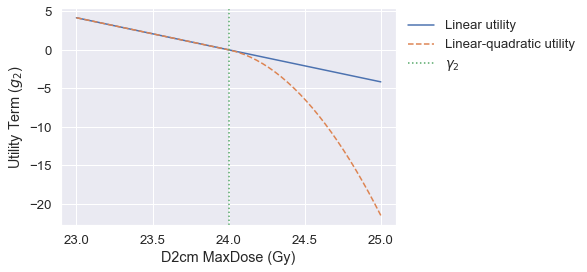

In [2]:
x = np.linspace(23, 25)
y1 = 100*(24 - x)/24
y2 = y1.copy()
y2[x > 24] = (1 - y2[x > 24])*y2[x > 24]
plt.plot(x, y1, label='Linear utility')
plt.plot(x, y2, linestyle='--', label='Linear-quadratic utility')
plt.axvline(24, linestyle=':', c='g', label='$\gamma_2$')
plt.xlabel('D2cm MaxDose (Gy)')
plt.ylabel('Utility Term ($g_2$)')
plt.legend(bbox_to_anchor=(1, 1), frameon=False)
plt.savefig('utility.png', dpi=300, bbox_inches='tight')

## Dose Values

In [3]:
def get_goal_diff(row):
    return get_percent_diff(row, 'dose_val', 'goal_val')

full_df = pd.concat([get_dose_df(plan_type) for plan_type in ['clinical', 'random', 'bayes']])
full_df['dose_name'] = full_df.apply(lambda row: row['dose_name'].replace('_', ' '), axis=1)
full_df['goal_diff'] = full_df.apply(get_goal_diff, axis=1)
full_df['iter_type'] = 'full'

stop_df = pd.concat([get_dose_df(plan_type, stop=True) for plan_type in ['random', 'bayes']])
stop_df['dose_name'] = stop_df.apply(lambda row: row['dose_name'].replace('_', ' '), axis=1)
stop_df['goal_diff'] = stop_df.apply(get_goal_diff, axis=1)
stop_df['iter_type'] = 'stop'

compare_df = pd.concat([full_df, stop_df])
compare_df = compare_df[compare_df['plan_type'] != 'clinical']

### With 100 Iterations

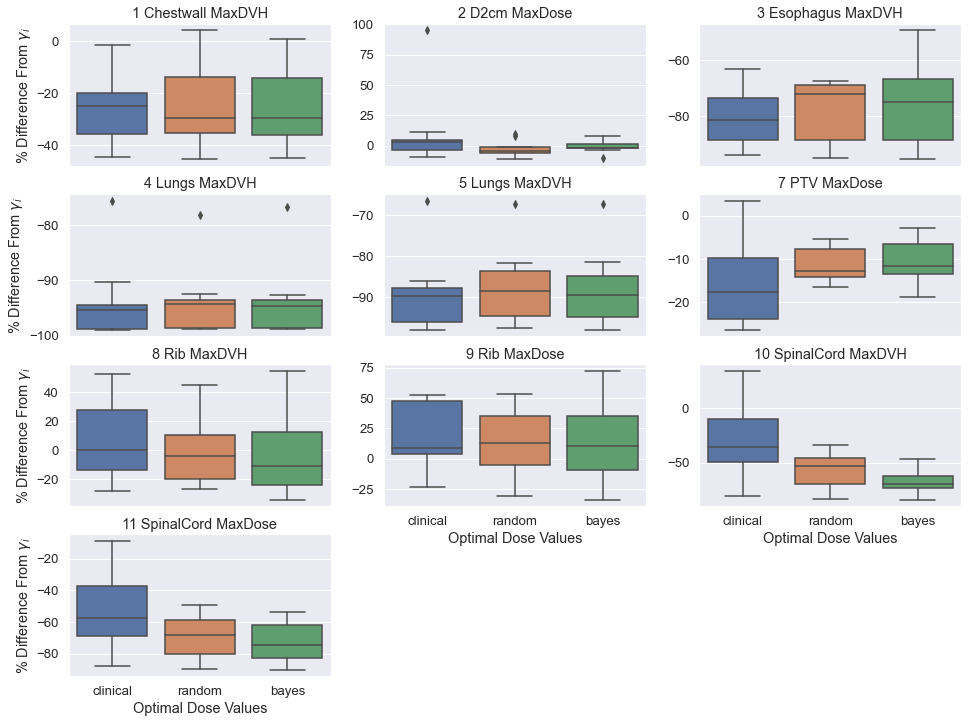

In [4]:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for ii, dose in enumerate(full_df['dose_name'].unique()):
    row, col = ii//3, np.mod(ii, 3)
    sns.boxplot(x='plan_type', y='goal_diff', palette='deep', 
                data=full_df[full_df['dose_name'] == dose], ax=ax[row][col])
    ax[row][col].set_title(dose)
    if (row == 3 and col == 0) or (row == 2 and col > 0):
        ax[row][col].set_xlabel('Optimal Dose Values') 
    else:
        ax[row][col].set_xlabel('')
        ax[row][col].set_xticklabels([])       
    if col == 0:
        ax[row][col].set_ylabel('% Difference From $\gamma_i$')
    else:
        ax[row][col].set_ylabel('')
ax[3][1].set_visible(False)
ax[3][2].set_visible(False)
plt.savefig('dose_full.png', dpi=300, bbox_inches='tight')

### With Stopping Conditions

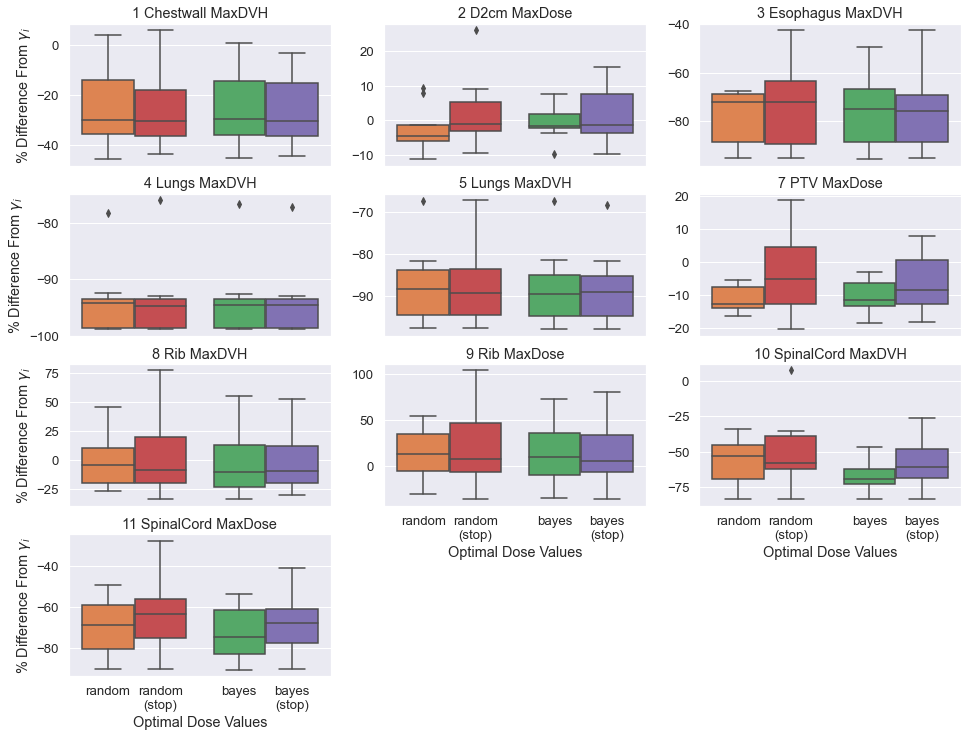

In [6]:
palette = sns.color_palette('deep')
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for ii, dose in enumerate(stop_df['dose_name'].unique()):
    row, col = ii//3, np.mod(ii, 3)
    sns.boxplot(x='plan_type', y='goal_diff', hue='iter_type',
                data=compare_df[compare_df['dose_name'] == dose], ax=ax[row][col])
    ax[row][col].set_title(dose)
    ax[row][col].legend().set_visible(False)
    if (row == 3 and col == 0) or (row == 2 and col > 0):
        ax[row][col].set_xlabel('Optimal Dose Values')
        ax[row][col].set_xticks([-0.2, 0.2, 0.8, 1.2])
        ax[row][col].set_xticklabels(['random', f"random\n(stop)", 'bayes', f"bayes\n(stop)"])
    else:
        ax[row][col].set_xlabel('')
        ax[row][col].set_xticklabels([])
    if col == 0:
        ax[row][col].set_ylabel(f"% Difference From $\gamma_i$")
    else:
        ax[row][col].set_ylabel('')
    ax[row][col].get_children()[26].set_facecolor(palette[1])
    ax[row][col].get_children()[27].set_facecolor(palette[3])
    ax[row][col].get_children()[28].set_facecolor(palette[2])
    ax[row][col].get_children()[29].set_facecolor(palette[4])
ax[3][1].set_visible(False)
ax[3][2].set_visible(False)
plt.savefig('dose_stop.png', dpi=300, bbox_inches='tight')

## Parameter Values

In [7]:
def get_par_diff(row):
    return get_percent_diff(row, 'par_val', 'goal_val')

pars_df = pd.concat([get_pars_df(plan_type) for plan_type in ['random', 'bayes']])
pars_df['par_name'] = pars_df.apply(lambda row: row['par_name'].replace('_', ' '), axis=1)
pars_df['par_diff'] = pars_df.apply(get_par_diff, axis=1)

### With 100 Iterations

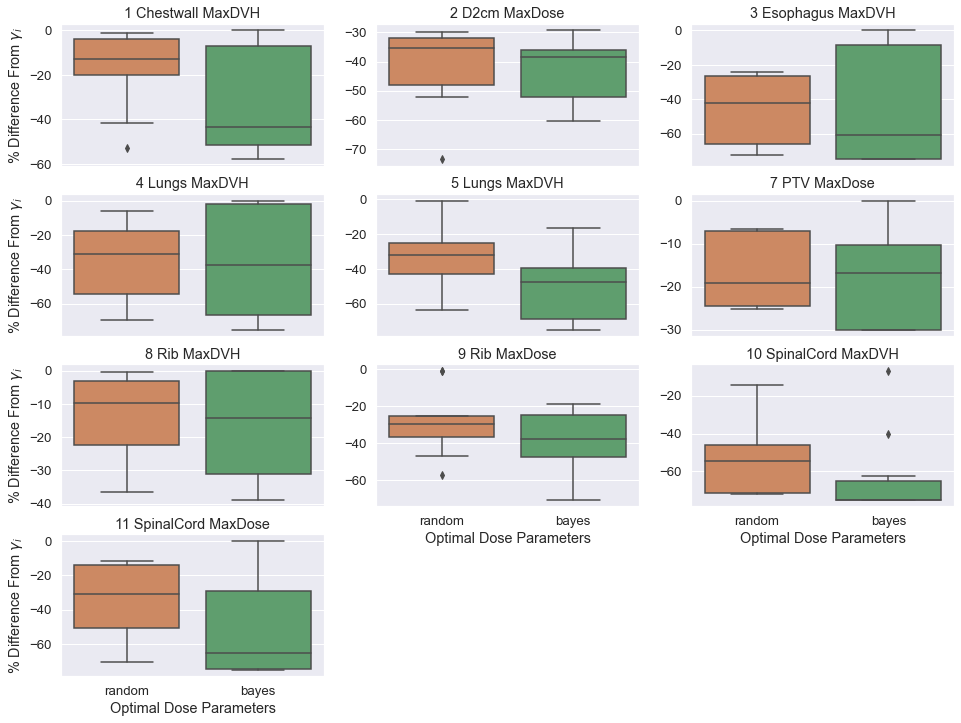

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for ii, par in enumerate(pars_df['par_name'].unique()):
    row, col = ii//3, np.mod(ii, 3)
    sns.boxplot(x='plan_type', y='par_diff', palette={'random': palette[1], 'bayes': palette[2]}, 
                data=pars_df[pars_df['par_name'] == par], ax=ax[row][col])
    
    ax[row][col].set_title(par)
    if (row == 3 and col == 0) or (row == 2 and col > 0):
        ax[row][col].set_xlabel('Optimal Dose Parameters')
    else:
        ax[row][col].set_xlabel('')
        ax[row][col].set_xticklabels([])
    if col == 0:
        ax[row][col].set_ylabel('% Difference From $\gamma_i$')
    else:
        ax[row][col].set_ylabel('')
ax[3][1].set_visible(False)
ax[3][2].set_visible(False)
plt.savefig('parameters.png', dpi=300, bbox_inches='tight')